In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
import math as ma
warnings.filterwarnings("ignore")

In [24]:
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheetname="NewCustomerList")
df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4.0,4,1.70312


In [3]:
df.rename(columns={"Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only. ":"customer_id"}, inplace = True)
df.rename(columns={"Unnamed: 1":"fname",
                   "Unnamed: 2":"lname",
                   "Unnamed: 3":"gender",
                   "Unnamed: 4":"3y_bike_purchases",
                   "Unnamed: 5":"DOB",
                   "Unnamed: 6":"JT"}, inplace = True)
df.rename(columns={"Unnamed: 7":"Category",
                   "Unnamed: 8":"wealth_segement",
                   "Unnamed: 9":"D_Indicator",
                   "Unnamed: 10":"default",
                   "Unnamed: 11":"owns_car",
                   "Unnamed: 12":"tenure"}, inplace = True)
df=df.iloc[1:]
df

,customer_id,fname,lname,gender,3y_bike_purchases,DOB,JT,Category,wealth_segement,D_Indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8
6,6,Curr,Duckhouse,Male,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13
7,7,Fina,Merali,Female,6,1976-02-23 00:00:00,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11
8,8,Rod,Inder,Male,31,1962-03-30 00:00:00,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7
9,9,Mala,Lind,Female,97,1973-03-10 00:00:00,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8
10,10,Fiorenze,Birdall,Female,49,1988-10-11 00:00:00,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20


In [4]:
(df["gender"].values)

array(['F', 'Male', 'Male', ..., 'U', 'Male', 'Male'], dtype=object)

In [5]:
df.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [6]:
df.gender.value_counts()

Female    2037
Male      1872
U           88
M            1
F            1
Femal        1
Name: gender, dtype: int64

# Contain Values like 'F', 'U', 'M', values are not consistent

In [7]:
df['gender'].replace('F', 'Female', inplace=True)
df['gender'].replace('Femal', 'Female', inplace=True)
df['gender'].replace('M', 'Male', inplace=True)
df['gender'].replace('U', 'Unknown', inplace=True)

In [8]:
# #now colum contain gender values that are male, female and not defined 
df.gender.value_counts()

Female     2039
Male       1873
Unknown      88
Name: gender, dtype: int64

In [9]:
df[['gender', 'owns_car']].head()

,gender,owns_car
1,Female,Yes
2,Male,Yes
3,Male,Yes
4,Male,No
5,Female,Yes


In [10]:
df[df['owns_car']=='Yes'].gender.value_counts()

Female     1027
Male        947
Unknown      50
Name: gender, dtype: int64

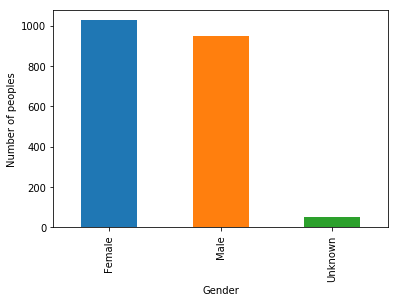

In [11]:
plot=df[df['owns_car']=='Yes'].gender.value_counts()
plt.xlabel('Gender')
plt.ylabel('Number of peoples')
plot
plot.plot(kind='bar')

# This shows that female mostly own the car

# Bike purchases 

In [14]:
df[['3y_bike_purchases','gender']]
female=df[df['gender']=='Female']['3y_bike_purchases'].sum()
male=df[df['gender']=='Male']['3y_bike_purchases'].sum()
unknown=df[df['gender']=='Not defined']['3y_bike_purchases'].sum()
print('female', female)
print('male', male)
print('unknown', unknown)

female 98359
male 93483
unknown 0


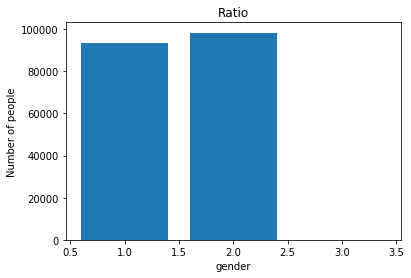

In [15]:
x=[1, 2,3 ]
y=[male, female, unknown]
plt.bar(x,y)
plt.xlabel('gender')
plt.ylabel('Number of people')
plt.title('Ratio')
plt.show()

# Default column is useless so drop the column

In [16]:
df.drop(['default'], axis=1, inplace=True)
df.head()

,customer_id,fname,lname,gender,3y_bike_purchases,DOB,JT,Category,wealth_segement,D_Indicator,owns_car,tenure
1,1,Laraine,Medendorp,Female,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8


# Column Jt contain some NaN values 

In [17]:
df.isna()

,customer_id,fname,lname,gender,3y_bike_purchases,DOB,JT,Category,wealth_segement,D_Indicator,owns_car,tenure
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,True,False,False,False,False,False
5,False,False,False,False,False,False,False,True,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,False,False
7,False,False,False,False,False,False,True,False,False,False,False,False
8,False,False,False,False,False,False,False,True,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
df.columns[df.isna().any()].tolist()

['lname', 'DOB', 'JT', 'Category', 'tenure']

In [20]:
lnamenan=df['lname'].isna().sum()
DOBnan=df['DOB'].isna().sum()
JTnan=df['JT'].isna().sum()
Categorynan=df['Category'].isna().sum()
tenurenan=df['tenure'].isna().sum()

In [21]:
print('lname', lnamenan)
print('DOB', DOBnan)
print('JT', JTnan)
print('Category',Categorynan)
print('tenure', tenurenan)

lname 125
DOB 87
JT 506
Category 656
tenure 87


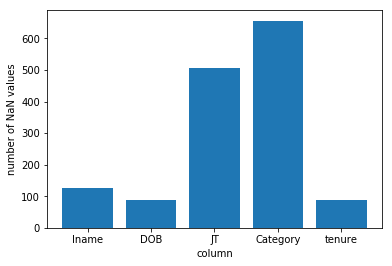

In [27]:
x=[1,2,3,4,5]
y=[lnamenan, DOBnan,JTnan,Categorynan,tenurenan]
label=['lname','DOB','JT','Category','tenure']
plt.xlabel('column')
plt.ylabel('number of NaN values')
plt.xticks(x,label)
plt.bar(x,y)

plt.show()

# category column has maximun nan values